In [63]:
from alpha_vantage.foreignexchange import ForeignExchange
import matplotlib.pyplot as plt
cc = ForeignExchange(key='OGRPFV5D58LC77OL',output_format='pandas')
import pandas as pd
from datetime import datetime
# get_currency_exchange_intraday()
# get_currency_exchange_daily()
# get_currency_exchange_weekly()
# get_currency_exchange_monthly()
#data_daily, meta_data = cc.get_currency_exchange_daily(from_symbol='EUR',to_symbol='USD', outputsize='full')
df60, meta_data = cc.get_currency_exchange_intraday(from_symbol='EUR',to_symbol='USD',interval='60min', outputsize='full')
pd.set_option('display.max_rows', 100)

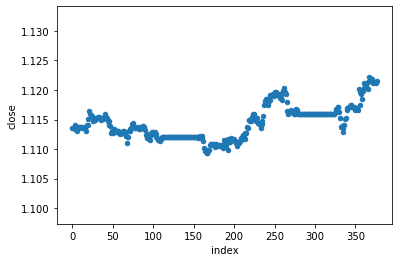

In [65]:
# df60.reset_index(inplace=True) #reset index to get timestamp out
# df60.reset_index(inplace=True) #reset index again to get number index out
# df60.columns = ['index','timestamp','open','high','low','close'] #Make sure column names are legit    
# df60.columns
# df60
df60.plot(x ='index', y='close', kind = 'scatter')

In [38]:
def cleanup_column(df):  
    df.columns = ['open','high','low','close'] #Make sure column names are legit    
    df.reset_index(inplace=True) #reset the fuclin index    
    return df

cleanup_column(df60)
df60.reset_index(inplace=True)
df60 = df60.loc[(df60['date'] > '2020-01-07 14:00:00')]


df60.sort_values(by=['index'],inplace=True,ascending=False)
df60['Day of Week'] = df60['date'].dt.day_name()

df1 = df60[df60.date.dt.weekday == 0]
df2 = df60[df60.date.dt.weekday == 1]
df3 = df60[df60.date.dt.weekday == 2]
df4 = df60[df60.date.dt.weekday == 3]
df5 = df60[df60.date.dt.weekday == 4]
dfconc = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)
dfconc = dfconc.drop('index', 1)

ValueError: Length mismatch: Expected axis has 6 elements, new values have 4 elements

In [68]:
#print(df60['index'])
df60.to_csv('filtered.csv')

In [ ]:
fig = plt.figure(figsize=(12,10))
fig.subplots_adjust(hspace=0.3)

# Divide the figure into a 2x1 grid, and give me the first section
ax1 = fig.add_subplot(211)

# Divide the figure into a 2x1 grid, and give me the second section
# ax2 = fig.add_subplot(212)
dfconc.plot(x='date', y='open', ax=ax1, legend=False)
# dfconc.plot(x='date', y='open', ax=ax2)
# ax2.yaxis.set_label_text("")
# ax2.invert_xaxis()
# ax2.set_ylim([1.110,1.115])
# ax1.set_title('60 min Open Prices')


In [ ]:
df_row_reindex = pd.concat([df1, df2], ignore_index=True)

In [ ]:
dfconc

In [ ]:

#dfconc[dfconc['Day of Week'].isin(['Monday', 'Tuesday'])]

In [ ]:
df['Day of Week'] = df['date'].dt.day_name()

new_df = dfconc.loc[dfconc['Day of Week'] == 'Saturday']
print(new_df.count())

In [ ]:
#dfconc.values

In [ ]:
dfconc.to_csv('filtered.csv')

In [ ]:
print(dfconc.values)